In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
def getCSV(csv):
    dfl = pd.read_csv(csv)
    return dfl
df = getCSV(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\afforestationArea.csv') 
print(df)

                                      Statistic Label  Year         County  \
0                     Extent of Forests and Woodlands  2021     Co. Carlow   
1                     Extent of Forests and Woodlands  2021      Co. Cavan   
2                     Extent of Forests and Woodlands  2021      Co. Clare   
3                     Extent of Forests and Woodlands  2021       Co. Cork   
4                     Extent of Forests and Woodlands  2021    Co. Donegal   
5                     Extent of Forests and Woodlands  2021     Co. Dublin   
6                     Extent of Forests and Woodlands  2021     Co. Galway   
7                     Extent of Forests and Woodlands  2021      Co. Kerry   
8                     Extent of Forests and Woodlands  2021    Co. Kildare   
9                     Extent of Forests and Woodlands  2021   Co. Kilkenny   
10                    Extent of Forests and Woodlands  2021      Co. Laois   
11                    Extent of Forests and Woodlands  2021    C

In [23]:
year = 2022
filtered_df = df[(df['Forest Owner'] == "Total Afforestation") & (df['Species'] == "Total Afforestation") & (df['Year'] == year)]
filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper())
print(filtered_df)

         Statistic Label  Year     County              Species  \
4860  Afforestation Area  2022     CARLOW  Total Afforestation   
4872  Afforestation Area  2022      CAVAN  Total Afforestation   
4884  Afforestation Area  2022      CLARE  Total Afforestation   
4896  Afforestation Area  2022       CORK  Total Afforestation   
4908  Afforestation Area  2022    DONEGAL  Total Afforestation   
4920  Afforestation Area  2022     DUBLIN  Total Afforestation   
4932  Afforestation Area  2022     GALWAY  Total Afforestation   
4944  Afforestation Area  2022      KERRY  Total Afforestation   
4956  Afforestation Area  2022    KILDARE  Total Afforestation   
4968  Afforestation Area  2022   KILKENNY  Total Afforestation   
4980  Afforestation Area  2022      LAOIS  Total Afforestation   
4992  Afforestation Area  2022    LEITRIM  Total Afforestation   
5004  Afforestation Area  2022   LIMERICK  Total Afforestation   
5016  Afforestation Area  2022   LONGFORD  Total Afforestation   
5028  Affo

C:\Users\Tom\AppData\Local\Temp\ipykernel_30324\2592944125.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['County'] = filtered_df['County'].apply(lambda x: x[4:].upper())


In [24]:
counties_shapefile = gpd.read_file(r'C:\Users\Tom\OneDrive\Documents\APROJECTS\Ireland_Counties\Counties___Ungen_2019.shp')


In [25]:
merged_data = counties_shapefile.merge(filtered_df, how='left', left_on='ENGLISH', right_on='County')
print(merged_data)

    OBJECTID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000    DONEGAL       Dún na nGall     100013   
1          2  120000   LIMERICK          Luimneach     100022   
2          3   80000    KILDARE          Cill Dara     100007   
3          4  220000  WATERFORD        Port Láirge     100026   
4          5  260000     DUBLIN  Baile Átha Cliath     100002   
5          6  230000  WESTMEATH          An Iarmhí     100016   
6          7  170000   MONAGHAN         Muineachán     100025   
7          8  250000    WICKLOW      Cill Mhantáin     100008   
8          9   40000       CORK           Corcaigh     100010   
9         10   70000      KERRY            Ciarraí     100005   
10        11  190000  ROSCOMMON         Ros Comáin     100027   
11        12  240000    WEXFORD        Loch Garman     100019   
12        13  130000   LONGFORD        An Longfort     100020   
13        14  160000      MEATH             An Mhí     100024   
14        15   20000     

In [26]:
merged_data['Forest Coverage Percentage'] = (merged_data['VALUE'] / (merged_data['SHAPE_Area'] / 10000)) * 100
merged_data['Forest Coverage Percentage'] = merged_data['Forest Coverage Percentage'].apply(lambda x: round(x*100, 2))
print(merged_data)

    OBJECTID   CO_ID    ENGLISH            GAEILGE LOGAINM_ID  \
0          1   50000    DONEGAL       Dún na nGall     100013   
1          2  120000   LIMERICK          Luimneach     100022   
2          3   80000    KILDARE          Cill Dara     100007   
3          4  220000  WATERFORD        Port Láirge     100026   
4          5  260000     DUBLIN  Baile Átha Cliath     100002   
5          6  230000  WESTMEATH          An Iarmhí     100016   
6          7  170000   MONAGHAN         Muineachán     100025   
7          8  250000    WICKLOW      Cill Mhantáin     100008   
8          9   40000       CORK           Corcaigh     100010   
9         10   70000      KERRY            Ciarraí     100005   
10        11  190000  ROSCOMMON         Ros Comáin     100027   
11        12  240000    WEXFORD        Loch Garman     100019   
12        13  130000   LONGFORD        An Longfort     100020   
13        14  160000      MEATH             An Mhí     100024   
14        15   20000     

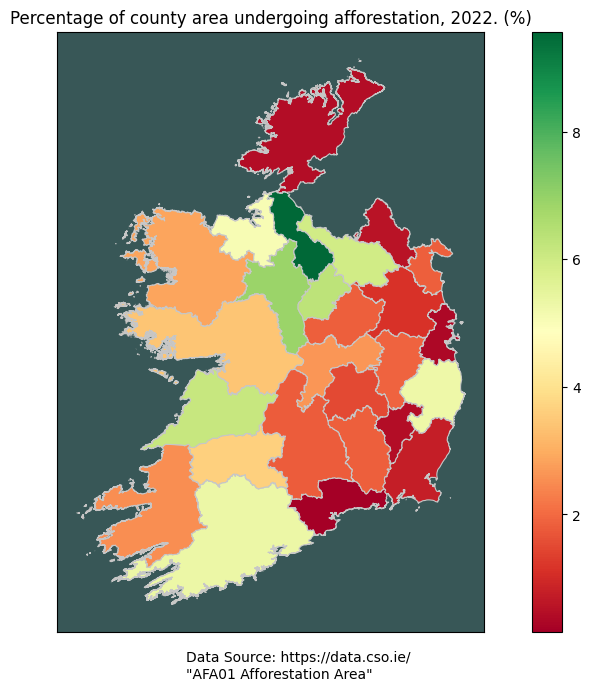

In [27]:
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the choropleth map
merged_data.plot(column='Forest Coverage Percentage', cmap='RdYlGn', linewidth=0.8, ax=ax, edgecolor='0.78', legend=True)

ax.set_facecolor('#385757') #
title_string = "Percentage of county area undergoing afforestation, "+str(year)+". (%)"
ax.set_title(title_string)
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('')
ax.set_ylabel('')

plt.subplots_adjust(left=0.1, right=0.90, top=0.90, bottom=0.15)
plt.text(0.3, -0.077, "Data Source: https://data.cso.ie/ \n\"AFA01 Afforestation Area\"", ha='left', transform=ax.transAxes)

plt.savefig('AfforestationPerCounty-'+str(year)+'.png')

plt.show()